<a href="https://colab.research.google.com/github/me5m7/System-Software-lab/blob/master/CS435Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q kaggle

In [ ]:
import kagglehub

# Download Dataset
path = kagglehub.dataset_download("sobhanmoosavi/us-accidents")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'us-accidents' dataset.
Path to dataset files: /kaggle/input/us-accidents


In [ ]:
import os

path = '/kaggle/input/us-accidents'
os.listdir(path)

['US_Accidents_March23.csv']

In [ ]:
cols_to_use = [
    'ID',                  # Accident ID
    'Severity',            # Accident severity (our target)
    'Start_Time',          # Start time of the accident
    'End_Time',            # End time of the accident
    'Start_Lat', 'Start_Lng',  # Accident location (latitude & longitude)
    'Weather_Condition',   # Weather condition
    'Temperature(F)',      # Temperature in Fahrenheit
    'Wind_Speed(mph)',     # Wind speed in mph
    'Visibility(mi)',      # Visibility in miles
    'Sunrise_Sunset',      # Day/Night indicator
    'Civil_Twilight',      # Civil twilight (light condition)
]

In [5]:
import pandas as pd

df = pd.read_csv(
    '/kaggle/input/us-accidents/US_Accidents_March23.csv',
    usecols=cols_to_use
)

df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Temperature(F),Visibility(mi),Wind_Speed(mph),Weather_Condition,Sunrise_Sunset,Civil_Twilight
0,A-1,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,36.9,10.0,NaN,Light Rain,Night,Night
1,A-2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,37.9,10.0,NaN,Light Rain,Night,Night
2,A-3,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,36.0,10.0,3.5,Overcast,Night,Night
3,A-4,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,35.1,9.0,4.6,Mostly Cloudy,Night,Day
4,A-5,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,36.0,6.0,3.5,Mostly Cloudy,Day,Day


In [6]:
df.shape

(7728394, 12)

In [7]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'Temperature(F)', 'Visibility(mi)', 'Wind_Speed(mph)',
       'Weather_Condition', 'Sunrise_Sunset', 'Civil_Twilight'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 12 columns):
 #   Column             Dtype  
---  ------             -----  
 0   ID                 object 
 1   Severity           int64  
 2   Start_Time         object 
 3   End_Time           object 
 4   Start_Lat          float64
 5   Start_Lng          float64
 6   Temperature(F)     float64
 7   Visibility(mi)     float64
 8   Wind_Speed(mph)    float64
 9   Weather_Condition  object 
 10  Sunrise_Sunset     object 
 11  Civil_Twilight     object 
dtypes: float64(5), int64(1), object(6)
memory usage: 707.6+ MB


In [9]:
df.isna() .sum()

,0
ID,0
Severity,0
Start_Time,0
End_Time,0
Start_Lat,0
Start_Lng,0
Temperature(F),163853
Visibility(mi),177098
Wind_Speed(mph),571233
Weather_Condition,173459


In [ ]:
import pandas as pd

df["Start_Time"] = pd.to_datetime(df["Start_Time"], errors="coerce")
df["End_Time"] = pd.to_datetime(df["End_Time"], errors="coerce")

In [ ]:
df["Duration_Minutes"] = (df["End_Time"] - df["Start_Time"]).dt.total_seconds() / 60

In [ ]:
# Display the number of missing values in each column
print("Missing values before cleaning:")
print(df.isna().sum())

# Drop columns that have a large percentage of missing values (e.g., more than 50%)
threshold = 0.5  # 50% threshold
df = df[df.columns[df.isnull().mean() < threshold]]

# Drop rows that have missing values in important columns after removing unnecessary columns
important_cols = ['Weather_Condition', 'Temperature(F)', 'Visibility(mi)']
df = df.dropna(subset=important_cols)

# Fill missing values if any remain
# Categorical columns
df['Weather_Condition'].fillna(df['Weather_Condition'].mode()[0], inplace=True)

# Numerical columns
df['Temperature(F)'].fillna(df['Temperature(F)'].mean(), inplace=True)
df['Visibility(mi)'].fillna(df['Visibility(mi)'].mean(), inplace=True)

# Check the missing values after cleaning
print("\nMissing values after cleaning:")
print(df.isna().sum())

Missing values before cleaning:
ID                        0
Severity                  0
Start_Time           743166
End_Time             743166
Start_Lat                 0
Start_Lng                 0
Temperature(F)       163853
Visibility(mi)       177098
Wind_Speed(mph)      571233
Weather_Condition    173459
Sunrise_Sunset        23246
Civil_Twilight        23246
Duration_Minutes     743166
dtype: int64


/tmp/ipython-input-2706395629.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Weather_Condition'].fillna(df['Weather_Condition'].mode()[0], inplace=True)
/tmp/ipython-input-2706395629.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].met


Missing values after cleaning:
ID                        0
Severity                  0
Start_Time           720143
End_Time             720143
Start_Lat                 0
Start_Lng                 0
Temperature(F)            0
Visibility(mi)            0
Wind_Speed(mph)      412592
Weather_Condition         0
Sunrise_Sunset        20143
Civil_Twilight        20143
Duration_Minutes     720143
dtype: int64


In [ ]:
# Drop rows with missing Start_Time, End_Time
df = df.dropna(subset=['Start_Time', 'End_Time', 'Duration_Minutes'])

# Fill missing Wind_Speed(mph) with median (to reduce effect of outliers)
df['Wind_Speed(mph)'] = df['Wind_Speed(mph)'].fillna(df['Wind_Speed(mph)'].median())

# Fill missing categorical columns with the most frequent value (mode)
df['Sunrise_Sunset'] = df['Sunrise_Sunset'].fillna(df['Sunrise_Sunset'].mode()[0])
df['Civil_Twilight'] = df['Civil_Twilight'].fillna(df['Civil_Twilight'].mode()[0])

# Check remaining missing values
print("Missing values after final cleaning:")
print(df.isna().sum())

Missing values after final cleaning:
ID                   0
Severity             0
Start_Time           0
End_Time             0
Start_Lat            0
Start_Lng            0
Temperature(F)       0
Visibility(mi)       0
Wind_Speed(mph)      0
Weather_Condition    0
Sunrise_Sunset       0
Civil_Twilight       0
Duration_Minutes     0
dtype: int64


Categorical columns after encoding:
   Weather_Condition  Sunrise_Sunset  Civil_Twilight
0                 61               1               1
1                 61               1               1
2                 87               1               1
3                 84               1               0
4                 84               0               0


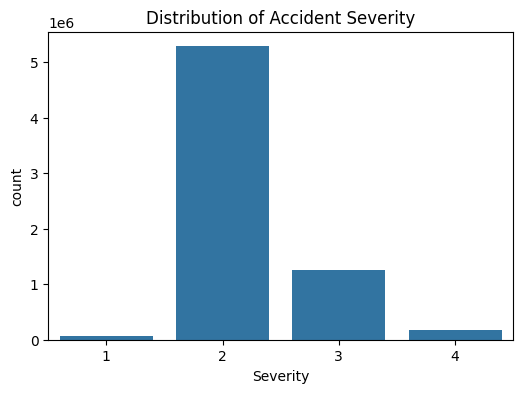

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Encoding categorical columns
categorical_cols = ['Weather_Condition', 'Sunrise_Sunset', 'Civil_Twilight']
le = LabelEncoder()

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

print("Categorical columns after encoding:")
print(df[categorical_cols].head())

# Exploratory Data Analysis (EDA)

# Distribution of accident severity
plt.figure(figsize=(6,4))
sns.countplot(x='Severity', data=df)
plt.title('Distribution of Accident Severity')
plt.show()



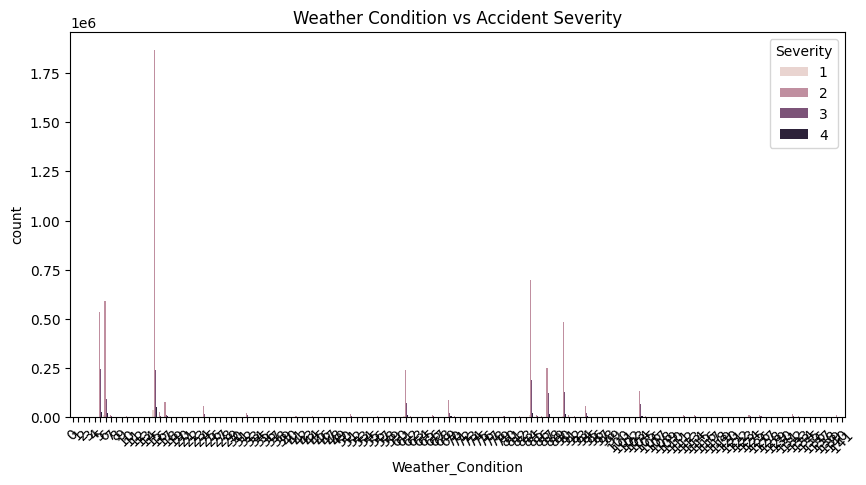

In [ ]:
# Relation between Weather_Condition and Severity
plt.figure(figsize=(10,5))
sns.countplot(x='Weather_Condition', hue='Severity', data=df)
plt.title('Weather Condition vs Accident Severity')
plt.xticks(rotation=45)
plt.show()

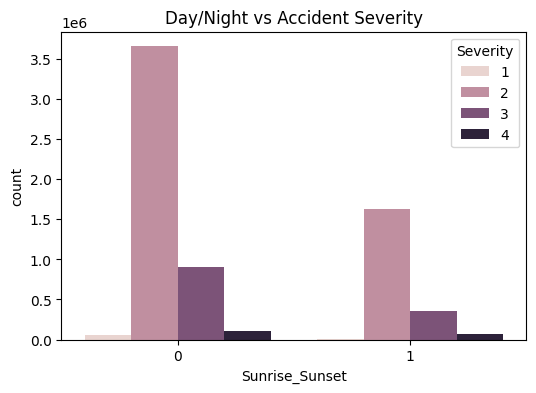

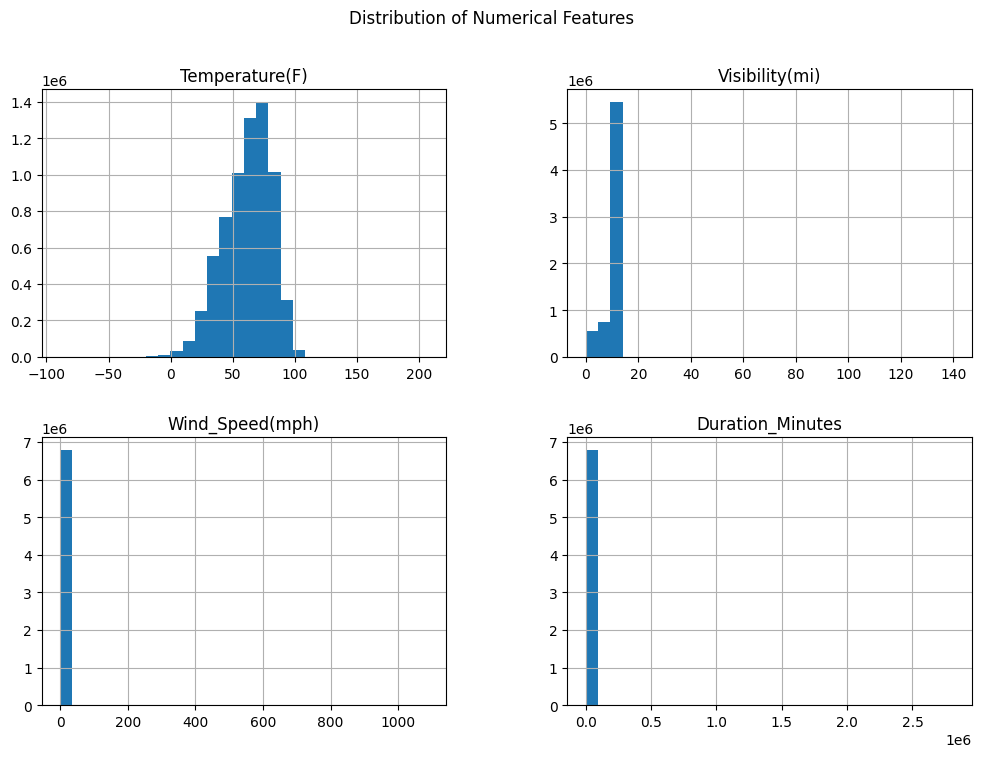

In [ ]:
# Relation between Sunrise_Sunset and Severity
plt.figure(figsize=(6,4))
sns.countplot(x='Sunrise_Sunset', hue='Severity', data=df)
plt.title('Day/Night vs Accident Severity')
plt.show()

# Distribution of numerical features
numerical_cols = ['Temperature(F)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Duration_Minutes']
df[numerical_cols].hist(figsize=(12,8), bins=30)
plt.suptitle('Distribution of Numerical Features')
plt.show()

# **Model Selection and Training**

In [ ]:
# Remove datetime columns
datetime_cols = df.select_dtypes(include=['datetime64[ns]']).columns
df = df.drop(datetime_cols, axis=1)

# Encode categorical columns
from sklearn.preprocessing import LabelEncoder
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = LabelEncoder().fit_transform(df[col].astype(str))

df = df.fillna(0)

#  Sample subset for faster training

In [ ]:
df_sample = df.sample(n=20000, random_state=42)

# Split target and features
y = df_sample['Severity']
X = df_sample.drop(['Severity'], axis=1)

#  Train-test split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training size:", X_train.shape)
print("Testing size:", X_test.shape)

Training size: (16000, 10)
Testing size: (4000, 10)


#  Train and evaluate models (Random Forest and SVM)

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

models = {
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC()
    }

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(name, "accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("-"*50)

Training Random Forest...
Random Forest accuracy: 0.794
              precision    recall  f1-score   support

           1       0.80      0.10      0.18        39
           2       0.81      0.96      0.88      3103
           3       0.59      0.27      0.37       752
           4       0.25      0.01      0.02       106

    accuracy                           0.79      4000
   macro avg       0.61      0.33      0.36      4000
weighted avg       0.76      0.79      0.75      4000

--------------------------------------------------
Training SVM...
SVM accuracy: 0.77575
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        39
           2       0.78      1.00      0.87      3103
           3       0.00      0.00      0.00       752
           4       0.00      0.00      0.00       106

    accuracy                           0.78      4000
   macro avg       0.19      0.25      0.22      4000
weighted avg       0.60      0.78      0

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


 #  Cross-validation scores(additional)

In [ ]:
from sklearn.model_selection import cross_val_score

for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5)
    print(f"{name} CV mean = {scores.mean():.4f}, std = {scores.std():.4f}")

Random Forest CV mean = 0.7915, std = 0.0033
SVM CV mean = 0.7757, std = 0.0001


#  Hyperparameter tuning-GridSearchCv(additional)

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [10, 20, None],
    "min_samples_split": [2, 5],
}

grid = GridSearchCV(
    RandomForestClassifier(),
    param_grid,
    cv=3,
    scoring="accuracy",
    n_jobs=-1
)

grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
print("Best score:", grid.best_score_)

# Final evaluation
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
print("\nFinal Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Best parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
Best score: 0.7868751897293543

Final Test Accuracy: 0.79775
              precision    recall  f1-score   support

           1       0.80      0.10      0.18        39
           2       0.82      0.96      0.88      3103
           3       0.61      0.28      0.38       752
           4       0.00      0.00      0.00       106

    accuracy                           0.80      4000
   macro avg       0.56      0.34      0.36      4000
weighted avg       0.76      0.80      0.76      4000



# 4.Model Evaluation and Testing

Final Test Accuracy: 0.79775

Classification Report:
              precision    recall  f1-score   support

           1       0.80      0.10      0.18        39
           2       0.82      0.96      0.88      3103
           3       0.61      0.28      0.38       752
           4       0.00      0.00      0.00       106

    accuracy                           0.80      4000
   macro avg       0.56      0.34      0.36      4000
weighted avg       0.76      0.80      0.76      4000



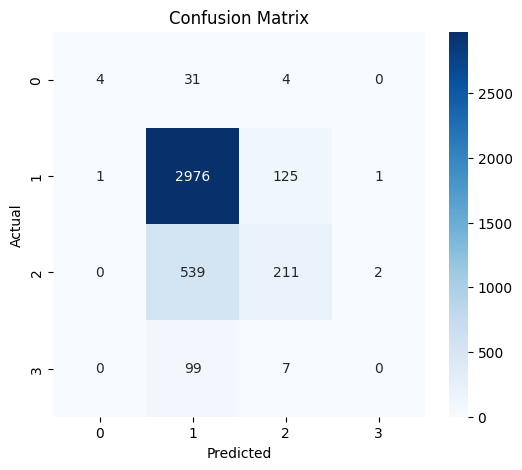


Number of misclassified samples: 809


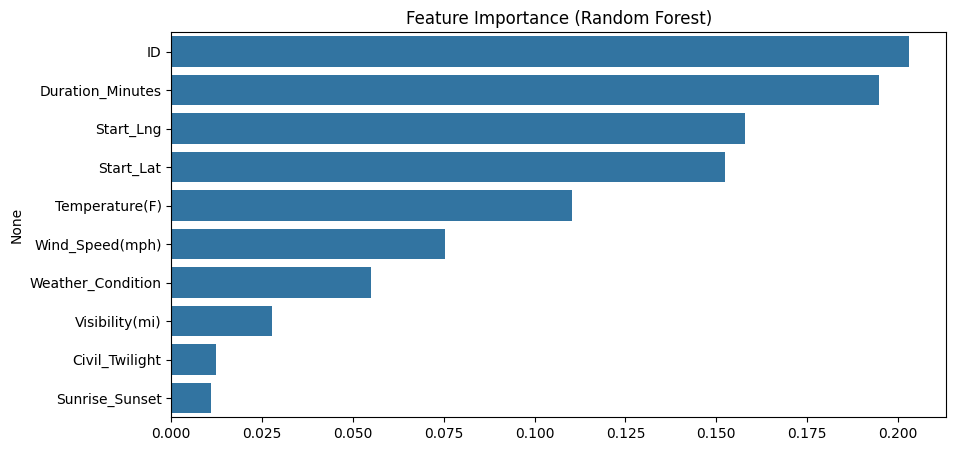

In [ ]:
# -------------------------------
# 4. MODEL EVALUATION & TESTING
# -------------------------------

from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ========== 1) Accuracy ==========
test_accuracy = accuracy_score(y_test, y_pred)
print("Final Test Accuracy:", test_accuracy)

# ========== 2) Classification Report ==========
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ========== 3) Confusion Matrix (Additional)==========
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ========== 4) Error Analysis (Additional)==========
df_errors = X_test.copy()
df_errors["Actual"] = y_test
df_errors["Predicted"] = y_pred
df_errors = df_errors[df_errors["Actual"] != df_errors["Predicted"]]

print("\nNumber of misclassified samples:", len(df_errors))
df_errors.head()

# ========== 5) Feature Importance (Additional)==========
importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,5))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title("Feature Importance (Random Forest)")
plt.show()

# Multiclass ROC Curve using One-vs-Rest(additional)

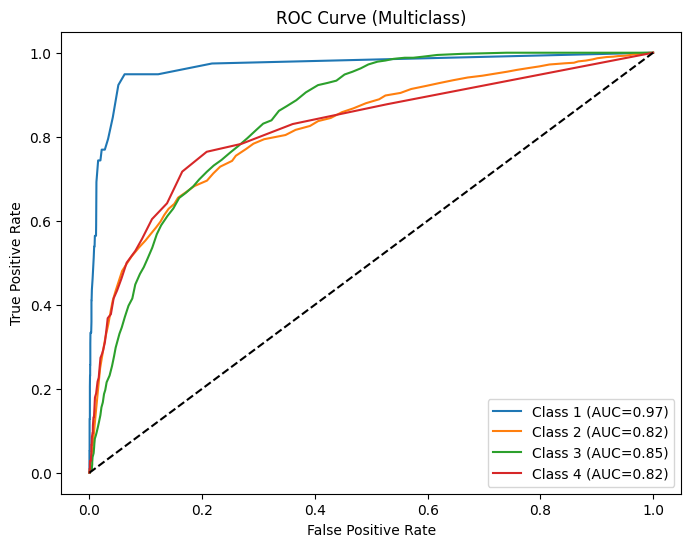

In [24]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Convert multiclass labels (1–4) into binary format for ROC
y_bin = label_binarize(y, classes=[1,2,3,4])
n_classes = y_bin.shape[1]

# Train a One-vs-Rest Random Forest model for multiclass ROC
model_ovr = OneVsRestClassifier(RandomForestClassifier())
model_ovr.fit(X_train, label_binarize(y_train, classes=[1,2,3,4]))

# Predict probability scores for each class
y_score = model_ovr.predict_proba(X_test)

plt.figure(figsize=(8,6))

# Compute ROC curve and AUC for each class
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(label_binarize(y_test, classes=[1,2,3,4])[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve for the class
    plt.plot(fpr, tpr, label=f"Class {i+1} (AUC={roc_auc:.2f})")

# Reference diagonal line (random classifier baseline)
plt.plot([0,1], [0,1], "k--")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Multiclass)")
plt.legend()
plt.show()

## Optional Task : SHAP Explainability to Analyze Feature Contributions in the Model


In [ ]:
# Optional Task: SHAP Explainability for SVM (SVC)
import shap

# Select a sample of the training set as background data for SHAP
X_background = X_train.sample(n=70, random_state=42)

# Select a sample from the test set to explain
X_test_sample = X_test.sample(n=70, random_state=42)

# Create SHAP explainer for SVM
explainer = shap.KernelExplainer(model.decision_function, X_background)

# Compute SHAP values for the selected test samples
print("Computing SHAP values... please wait, this may take some time.")
shap_values = explainer.shap_values(X_test_sample)

# Summary plot showing the importance of each feature
print("\nSHAP Summary Plot - Feature Importance")
shap.summary_plot(shap_values, X_test_sample, plot_type="bar")


Computing SHAP values... please wait, this may take some time.


  0%|          | 0/70 [00:00<?, ?it/s]